<a href="https://colab.research.google.com/github/Nniikkoollaass/forecasting-customer-outflow/blob/model-development/model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h5py keras tensorflow

XGBoost (eXtreme Gradient Boosting) - метод підсилення градієнта (Gradient Boosting), який використовується для задач класифікації та регресії.

Використовується для задач класифікації та регресії.

Алгоритм базується на побудові ансамблю слабких моделей (дерев рішень), де кожне наступне дерево намагається виправити помилки попередніх.

Метою є зменшення помилки на тренувальній вибірці через підсилення (boosting).

Це алгоритм ансамблевого навчання, який використовує метод градієнтного бустингу над деревами рішень.

XGBoost створює ансамбль дерев рішень, послідовно додаючи нові дерева, які коригують помилки попередніх.

Головна ідея полягає в додаванні нових дерев таким чином, щоб мінімізувати втрати за рахунок використання градієнта помилки. XGBoost поєднує результати багатьох дерев рішень для отримання остаточного прогнозу.

В XGBoost використовується метод градієнтного бустингу для покращення точності моделей, що включає побудову нових дерев на основі залишкових помилок попередніх дерев.

XGBoost використовує дерева рішень як базові моделі, але він включає додаткові механізми для покращення продуктивності і точності, роблячи його більш складним і потужним алгоритмом порівняно з окремими деревами рішень.

"Бустинг" (boosting) означає метод ансамблевого навчання, який покращує продуктивність слабких моделей (наприклад, дерев рішень) шляхом їх послідовного навчання. Ідея полягає в тому, щоб додавати нові моделі, які коригують помилки попередніх моделей. У підсумку, ці моделі комбінуються для отримання більш точної остаточної моделі.

Спочатку тренується базова модель (перше дерево рішень) на всіх даних.

Обчислюються помилки або залишки (різниця між прогнозованими та фактичними значеннями).

Друга модель тренується на основі цих помилок. Вона намагається передбачити помилки попередньої моделі.

Результати першої та другої моделей комбінуються для поліпшення точності.

Процес повторюється, додаванням нових моделей, кожна з яких коригує помилки попередніх. Кожна наступна модель додається таким чином, щоб мінімізувати загальні помилки.

Навчання відбувається послідовно, де кожне наступне дерево в ансамблі намагається виправити помилки попередніх дерев, оптимізуючи залишкові помилки за допомогою градієнтного спуску.

При кожній ітерації вага даних, які були неправильно класифіковані, збільшується, що змушує наступні моделі більше зосереджуватися на цих складних випадках.

Кінцева модель являє собою ансамбль багатьох слабких моделей, де кожна нова модель коригує помилки попередніх, що призводить до високої точності прогнозування.

Бустинг є потужним інструментом у машинному навчанні, який дозволяє створювати точні прогностичні моделі, комбінуючи кілька слабких моделей у сильний ансамбль.

Accuracy: 0.8225943797899518
Recall: 0.7984126984126985
Precision: 0.8608100399315459
F1 Score: 0.8284381004666483
ROC-AUC: 0.8244972248952653
Best parameters found: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}
Cross-validation scores for XGBoost: [0.81574947 0.82512165 0.81934307 0.82542579 0.81386861 0.81082725
 0.82816302 0.81934307 0.8229927  0.83059611]
Mean cross-validation score for XGBoost: 0.8211430733130193


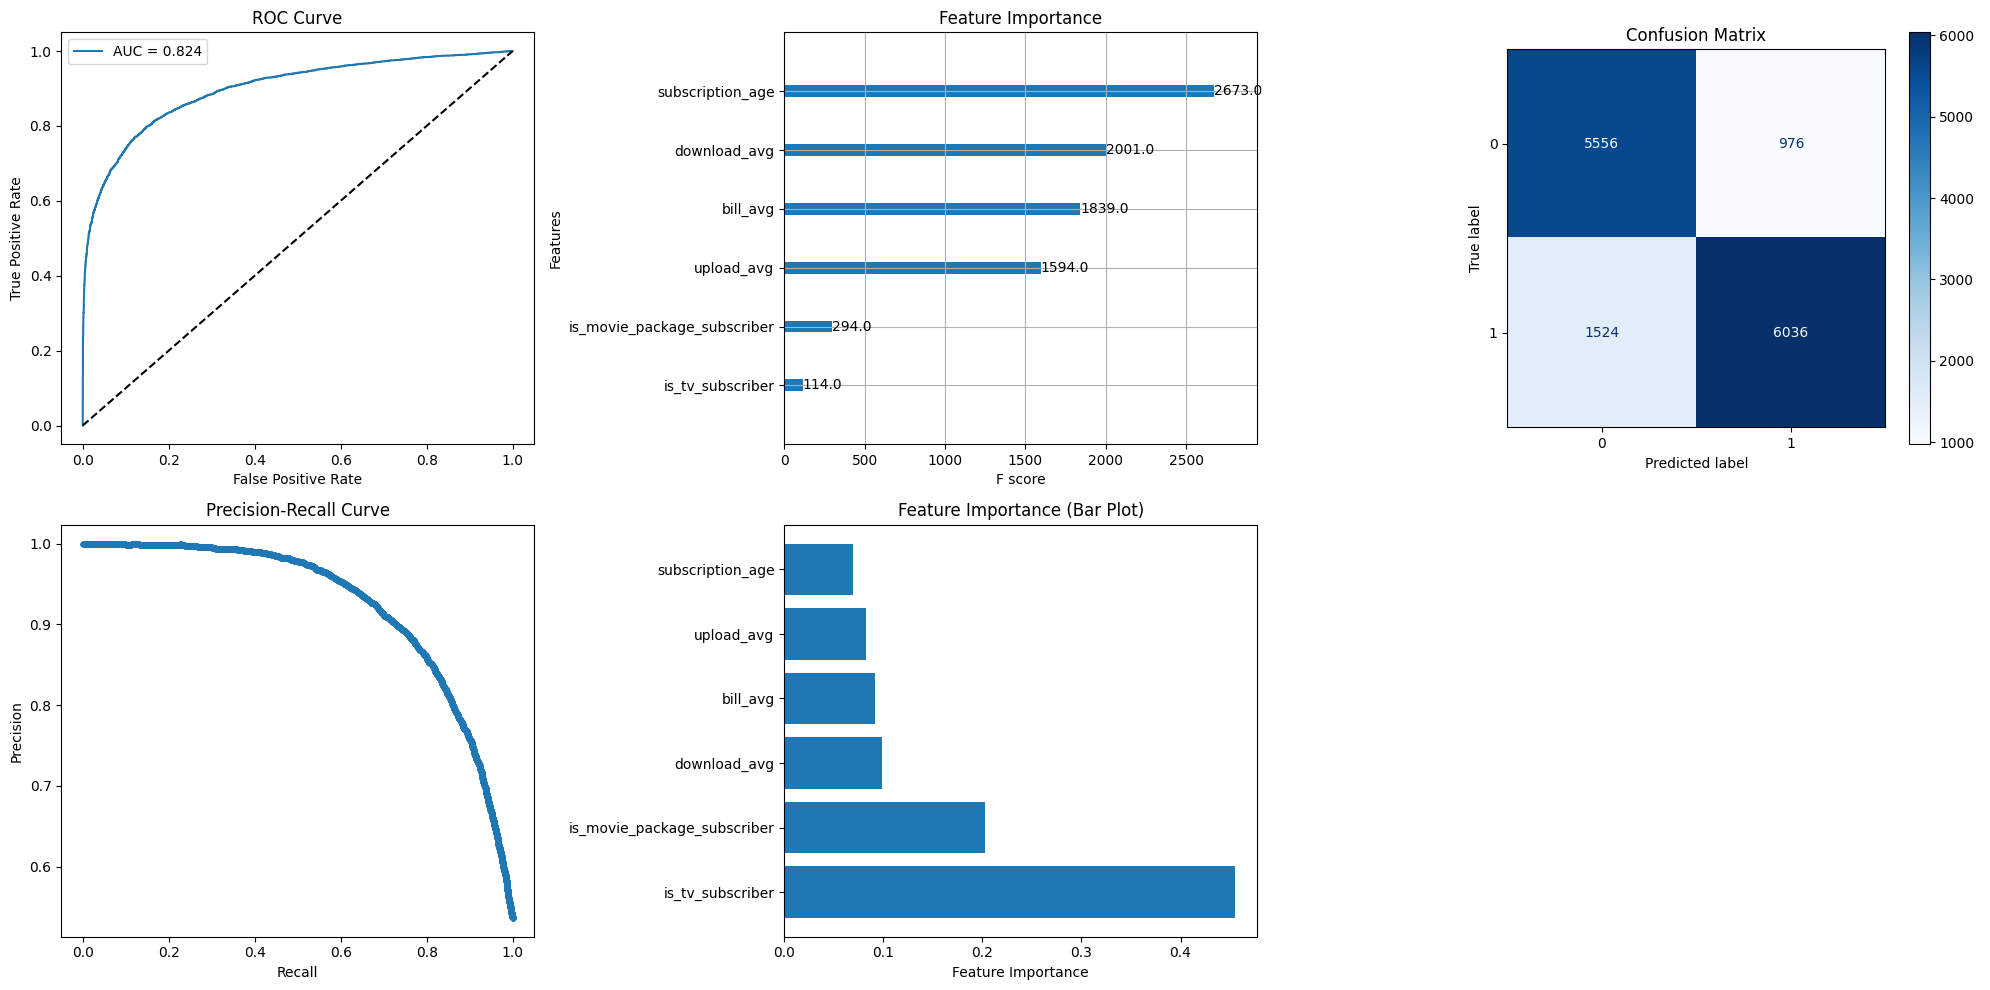

In [5]:
# імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

# завантажуємо дані
data = pd.read_csv('/content/sample_data/data/data4.csv')

# розділяємо дані на ознаки (model_signs) та мітки (goal)
# видаляємо колонку 'сhurn' з набору даних data, залишаючи всі інші колонки як ознаки. axis=1 означає, що ми видаляємо колонку, а не рядок
model_signs = data.drop('churn', axis=1)  # будуть ознаки - є даними, на основі яких ми будемо робимо прогнози
# вибираємо колонку 'сhurn' як цільову змінну, яку модель буде прогнозувати
goal = data['churn'] # це мітка - є тим, що ми намагаємося передбачити

# використовуємо train_test_split для розподілу даних на навчальну та тестову вибірки
model_signs_trained, model_signs_tested, goal_trained, goal_tested = train_test_split(model_signs, goal, test_size=0.3, random_state=42, stratify=goal)
# 'test_size': відсоток даних, що будуть використані для тестування в нашому вмпадку 30 % (зазвичай буває 20-30 %)
# 'random_state': є параметром, який використовується для фіксації початкового значення генератора випадкових чисел
# фіксоване значення random_state дозволяє будь-кому отримувати однакові результати при кожному запуску коду
# 'goal': містить цільову змінну churn, яку намагаємося передбачити
# 'stratify=goal': це параметр, який забезпечує збереження пропорцій класів у навчальному та тестовому наборах даних

# клас XGBClassifier з бібліотеки XGBoost (Extreme Gradient Boosting) використовується для класифікаційних завдань машинного навчання
# створюємо екземпляр моделі XGBoost для класифікації з параметрами за замовчуванням
# це означає, що модель буде працювати з налаштуваннями, які розробники XGBoost вважають оптимальними для широкого спектру завдань
# якби для забезпечення балансу між простотою початкового налаштування
# і можливістю гнучкої оптимізації для досягнення найкращих результатів
# при потребі можна використати наступні парамемтри:
# 1 - 'n_estimators': кількість дерев у моделі (кількість ітерацій бустингу)
# 2 - 'learning_rate': швидкість навчання, це коефіцієнт,
# на який зменшується вплив кожного додаткового дерева, типові значення: 0.01, 0.1, 0.2
# 3 - 'max_depth': максимальна глибина кожного дерева
# більші значення можуть призвести до перенавчання, менші - до недонавчання
# 4 - 'min_child_weight': мінімальна сума ваг усіх спостережень, необхідних у вузлі
# використовується для запобігання перенавчанню
# 5 - 'subsample': відсоток вибірки для кожного дерева
# значення між 0 і 1, використовується для запобігання перенавчанню
# 6 - 'colsample_bytree': відсоток вибірки ознак для кожного дерева, Значення між 0 і 1
# 7 - 'gamma': мінімальна зміна функції втрат, необхідна для розщеплення вузла
# чим більше значення, тим жорсткіші умови для розщеплення вузла
# 8 - 'reg_alpha': L1 регуляризація ваг
# 9 - 'reg_lambda': L2 регуляризація ваг
# вузол (node) - це точка, на якій дані розділяються на дві частини,
# виходячи з певного критерію, Кожне дерево у моделі складається з кореневого вузла, внутрішніх вузлів та листових вузлів
xgboost_model = xgboost.XGBClassifier()

# задаємо діапазони значень для гіперпараметрів, які будуть використовуватися в процесі пошуку
# найкращих параметрів моделі XGBoost за допомогою GridSearchCV
# кожен параметр має список можливих значень, які GridSearchCV буде перебирати для визначення оптимальних
# GridSearchCV — це метод з бібліотеки scikit-learn, що використовується для автоматизованого підбору
# гіперпараметрів моделі шляхом перебору всіх можливих комбінацій заданих параметрів
# і вибору найкращих на основі певного критерію оцінки
# - 1 - 'learning_rate' (або 'eta') - швидкість навчання визначає, наскільки швидко
# або повільно модель оновлює свої параметри під час тренування
# це коефіцієнт, на який помножаються ваги, щоб зменшити їхній вплив, тим самим стабілізуючи процес навчання
# зазвичай менші значення learning_rate призводять до більш стабільного навчання,
# але потребують більшої кількості ітерацій (тобто більшого значення 'n_estimators')
# - 2 - 'n_estimators' - rількість дерев у моделі, більша кількість дерев може поліпшити точність моделі, але також може призвести до перенавчання
# оптимальне значення зазвичай залежить від розміру та складності набору даних
# більше значення n_estimators потребує більше часу для навчання
# - 3 - 'max_depth' - максимальна глибина кожного дерева, визначає, наскільки глибоким може бути кожне дерево в ансамблі
# глибші дерева можуть захоплювати більш складні взаємозв'язки в даних,
# але також можуть призвести до перенавчання, менша глибина може призвести до недонавчання
xgboost_parameters = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 9]}

# крос-валідація
# використовуємо GridSearchCV для пошуку кращих параметрів
xgboost_search = GridSearchCV(xgboost_model, xgboost_parameters, cv=10, scoring='accuracy')
# 'xgboost_model': наша модель
# 'xgboost_parameters': наші діапазони параметрів
# 'cv': означає кількість фолдів у крос-валідації, ми використовуємо 10-кратну крос-валідацію,
# тобто дані розбиваються на 10 частин, і кожна частина по черзі використовується як тестовий набір,
# тоді як інші частини використовуються як тренувальні набори
# 'scoring': задає метрику, яку використовують для оцінки продуктивності моделі,
# таким чином ми забезпечуємо автоматичний пошук оптимальних гіперпараметрів,
# запобігаємо перенавчанню та також використання крос-валідації з різними фолдами;
# він надає більш об'єктивну оцінку продуктивності моделі порівняно з простою тренувальною та тестовою вибіркою

# виконуємо навчання моделі на навчальних даних model_signs_trained і мітках goal_trained
xgboost_search.fit(model_signs_trained, goal_trained)
# - 'model_signs_trained': це навчальні дані, які включають ознаки (фічі), використані для навчання моделі,
# в нашому випадку це всі колонки датасету, крім колонки міток сhurn
# - 'goal_trained': це мітки, що вказують на цільові значення (в даному випадку churn),
# які модель має навчитися передбачати. Мітки вказують, чи залишився клієнт (0) або припинив користування послугами (1)

# навчання моделі з кращими параметрами
# атрибут 'best_estimator_' зберігає модель з найкращою комбінацією гіперпараметрів
# ця модель тепер готова до використання для прогнозування на нових даних
best_model = xgboost_search.best_estimator_

# зберігаємо модель XGBoost в json файл для етапу підготовки інтерфейсу
best_model.save_model('xgboost_model.json')

# робимо передбачення на тестовій вибірці
goal_predicted = best_model.predict(model_signs_tested)

# оцінка моделі
# точність визначає частку правильних передбачень серед усіх передбачень
# надає загальну оцінку, як добре модель класифікує дані
# ця функція з бібліотеки scikit-learn обчислює точність моделі,
# порівнюючи фактичні мітки y_tested з передбаченими мітками goal_predicted.
accuracy = accuracy_score(goal_tested, goal_predicted)
# повнота визначає частку правильно передбачених позитивних прикладів серед усіх фактичних позитивних прикладів
recall = recall_score(goal_tested, goal_predicted)
# точність визначає частку правильно передбачених позитивних прикладів серед усіх передбачених позитивних прикладів
# важлива, коли вартість помилково позитивних прикладів висока
precision = precision_score(goal_tested, goal_predicted)
# є гармонійним середнім між точністю і повнотою
# є важливою, коли потрібно збалансувати точність і повноту
f1 = f1_score(goal_tested, goal_predicted)
# обчислює метрику "площа під кривою характеристик роботи приймача" (ROC-AUC) для моделі класифікації
# допомагає зрозуміти, наскільки добре модель розрізняє класи,
# і може бути використана для порівняння різних моделей класифікації на одному наборі даних
# є ефективним способом оцінки класифікаційних моделей, забезпечуючи глибше розуміння їх продуктивності на тестових даних
roc_auc = roc_auc_score(goal_tested, goal_predicted)

# виводимо результати оцінки
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(f'Best parameters found: {xgboost_search.best_params_}')

# крос-валідаційні оцінки
# використовуємо функцію cross_val_score з бібліотеки sklearn для виконання крос-валідації на навчальному наборі даних
cv_scores = cross_val_score(best_model, model_signs_trained, goal_trained, cv=10, scoring='accuracy')
# крос-валідація з 10 фолдами є однією з найбільш популярних технік оцінки моделей,
# оскільки забезпечує баланс між обчислювальними витратами і точністю оцінки
# використання крос-валідації дозволяє отримати надійну оцінку продуктивності моделі
# і краще зрозуміти, як вона буде працювати на нових, невідомих даних
# функція cross_val_score з параметрами cv=10 і scoring='accuracy' забезпечує
# надійний спосіб оцінки продуктивності моделі за допомогою 10-фолд крос-валідації,
# використовуючи метрику точності, це допомагає отримати об'єктивну оцінку моделі і зменшити ризик перенавчання

# друкуємо результати
print(f'Cross-validation scores for XGBoost: {cv_scores}')
print(f'Mean cross-validation score for XGBoost: {cv_scores.mean()}')

# графіки
# створюємо графік з двома підграфіками (subplots) у форматі 1 рядка та 2 стовпців
# та встановлюємо розмір фігури (графіку) за допомогою параметра figsize
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# - 1 - 'fig': це об'єкт фігури (графіка), який містить один або більше підграфіків,
# він використовується для налаштування зовнішнього вигляду та властивостей всієї фігури
# - 2 - 'axs': це масив об'єктів підграфіків (Axes), які містять кожен окремий підграфік
# в нашому випадку axs містить два підграфіки, оскільки ми вказали 1 рядок і 2 стовпці
# - 3 - '2, 3': ці параметри визначають кількість рядків та стовпців підграфіків
# в нашому випадку ми маємо 2 рядки і три стовпці, що означає,
# що буде створено два підграфіки розташованих поруч горизонтально
# - 4 - 'figsize=(20, 10)': це параметр, який визначає розмір фігури (графіка) в дюймах
# значення (20, 10) означає, що ширина фігури буде 20 дюймів, а висота - 10 дюймів

# ROC-крива
# обчислюємо значення False Positive Rate (FPR) і True Positive Rate (TPR) для побудови ROC кривої,
# використовуючи модель, що вже навчена, для прогнозування ймовірностей на тестовому наборі даних
fpr, tpr, _ = roc_curve(goal_tested, best_model.predict_proba(model_signs_tested)[:, 1])
# - 1 - 'fpr': False Positive Rate (хибнопозитивна частота) – кількість хибнопозитивних результатів,
# поділена на загальну кількість негативних випадків
# - 2 - 'tpr': True Positive Rate (істинно позитивна частота) – кількість істиннопозитивних результатів,
# поділена на загальну кількість позитивних випадків
# - 3 - '_': це значення порогів, які використовуються для обчислення FPR і TPR,
# ми не використовуємо, тому зберігаємо в змінній '_'
# - 4 -'goal_tested': wе справжні значенyz класів для тестового набору даних
# - 5 -'best_model': це навчена модель
# - 6 -'predict_proba()': метод, який повертає ймовірності для кожного класу
# - 7 '[:, 1]': – індексація, яка вибирає ймовірності для позитивного класу (клас з міткою 1)
# для побудови ROC кривої, яка візуалізує здатність моделі розрізняти між позитивними і негативними класами при різних порогах

# будуємо графік ROC кривої на першій осі (axs[0])
# з використанням обчислених значень хибнопозитивної частоти (FPR)
# та істинно позитивної частоти (TPR), та додаємо мітку з обчисленим значенням площі під кривою (AUC)
axs[0, 0].plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
# 'label=f'AUC = {roc_auc:.3f}'': – мітка для легенди графіка, яка показує значення AUC з точністю до трьох десяткових знаків
# 'axs': є масивом або матрицею осей, створених за допомогою функції plt.subplots()
# 'axs[0, 0]': означає, що графік буде відображений в першому рядку і першій колонці сітки

# додаємо до графіка діагональну штрихову лінію, яка представляє випадковий класифікатор,
# ця лінія служить еталоном для оцінки продуктивності класифікатора,
# якщо ROC крива вашої моделі знаходиться вище цієї лінії, це означає, що модель перевершує випадковий класифікатор
axs[0, 0].plot([0, 1], [0, 1], 'k--')

# встановлюємо мітку для осі X на графіку ROC кривої,
# для рівня хибних позитивних результатів
# допомагає візуалізувати продуктивність класифікаційної моделі,
# показуючи, як часто модель робить хибні позитивні прогнози
axs[0, 0].set_xlabel('False Positive Rate')

# встановлюємо мітку для осі Y на графіку ROC кривої,
# для рівня справжніх позитивних результатів
# допомагає візуалізувати продуктивність класифікаційної моделі,
# показуючи, наскільки часто модель правильно визначає позитивні результати
axs[0, 0].set_ylabel('True Positive Rate')

# метод для встановлення заголовка графіка на конкретній підграфіці (subplot) в багатопанельному графіку
axs[0, 0].set_title('ROC Curve')

# додаємо легенду
# легенда пояснює, що означає кожна лінія на графіку ROC кривої
axs[0, 0].legend()

# оцінка важливості ознак
# будуємо графік важливості ознак (фіч) моделі XGBoost
# і відображаємо його на другій панелі (правій) у наборі графіків
xgboost.plot_importance(best_model, ax=axs[0, 1])
# 'best_model': це навчена модель
# 'ax=axs[0, 1]': це аргумент, який визначає, на якій панелі буде побудований графік
# 'axs[0, 1]': означає, що графік буде відображений в першому рядку і другій колонці сітки
# дозволяє зрозуміти, які ознаки мають найбільший вплив на рішення моделі,
# що може бути корисно для оптимізації моделі та розуміння процесу прийняття рішень
# функція xgboost.plot_importance створює графік для найкращої моделі XGBoost
# і відображає його на правій панелі набору графіків

# метод для встановлення заголовка графіка на конкретній підграфіці (subplot) в багатопанельному графіку
axs[0, 1].set_title('Feature Importance')

# матриця плутанини (Confusion Matrix)
# допомагає зрозуміти, скільки передбачень були правильними, а скільки помилковими, і в яких класах
# функція 'confusion_matrix' з бібліотеки sklearn.metrics обчислює матрицю плутанини,
# яка є двовимірною таблицею, що відображає кількість правильних і неправильних класифікацій для кожного класу
cm = confusion_matrix(goal_tested, goal_predicted)
# створює об'єкт для візуалізації матриці плутанини
# об'єкт ConfusionMatrixDisplay, який містить дані матриці плутанини і готовий до відображення
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# 'disp.plot(...)': метод класу ConfusionMatrixDisplay, який відображає матрицю плутанини на заданій осі
# 'ax': параметр, що задає осі (subplot) на якій буде побудований графік
# 'axs': масив об'єктів осей (subplots) # 'axs': є масивом або матрицею осей, створених за допомогою функції plt.subplots()
# 'axs[0, 2]': вказує на осі у першому рядку та третьому стовпці графіка,
# що дозволяє відобразити матрицю плутанини на конкретному місці
# 'cmap': параметр, що задає кольорову карту, яка визначає, як значення в матриці будуть представлені кольорами
# 'plt.cm.Blues': кольорова карта з бібліотеки matplotlib, яка використовує різні відтінки синього для відображення значень
disp.plot(ax=axs[0, 2], cmap=plt.cm.Blues)

# метод для встановлення заголовка графіка на конкретній підграфіці (subplot) в багатопанельному графіку
axs[0, 2].set_title('Confusion Matrix')

# Precision-Recall Curve
# ілюструє точність та повноту моделі, особливо при роботи з незбалансованими даними
# обчислює криву точності та повноти (Precision-Recall Curve) для моделі
precision_vals, recall_vals, _ = precision_recall_curve(goal_tested, best_model.predict_proba(model_signs_tested)[:, 1])
# 'precision_recall_curve()': функція з бібліотеки sklearn.metrics,
# яка обчислює точність (precision) та повноту (recall) при різних порогах для моделі
# 'best_model.predict_proba(model_signs_tested)[:, 1]': прогнозовані ймовірності для позитивного класу (клас з міткою 1),
# метод 'predict_proba()' повертає ймовірності для всіх класів,
# тому '[:, 1]' вибирає ймовірності для позитивного класу
# 'precision_vals': масив значень точності (precision) для різних порогів,
# точність визначає частку правильних позитивних передбачень серед усіх позитивних передбачень
# 'recall_vals': масив значень повноти (recall) для різних порогів,
# повнота визначає частку правильно передбачених позитивних прикладів серед усіх справжніх позитивних прикладів
# '_': змінна, яка зберігає значення порогів (thresholds), що використовуються для обчислення точності та повноти,
# ми не використовуємо ці пороги у подальшому коді, тому їх зазвичай присвоюють змінній _, що є конвенцією для невикористовуваних змінних

# використовує бібліотеку Matplotlib для побудови графіка точності-повноти (Precision-Recall Curve) на підграфіку axs[1, 0]
axs[1, 0].plot(recall_vals, precision_vals, marker='.')
# 'plot()': метод об'єкта Axes, який створює графік на відповідному підграфіку
# 'recall_vals': масив значень повноти (recall), отриманих з функції precision_recall_curve(), це значення по осі X на графіку.
# 'precision_vals': масив значень точності (precision), отриманих з функції precision_recall_curve(), це значення по осі Y на графіку
# 'marker='.'': параметр, який вказує, що точності та повноти повинні бути зображені як окремі точки на графіку,
# marker='.' означає, що точки будуть зображені як маленькі крапки

# налаштовує підпис осі X на підграфіку, розташованому в другому рядку і першому стовпчику сітки графіків
axs[1, 0].set_xlabel('Recall')
# налаштовує підпис осі Y на підграфіку, розташованому у другому рядку і першому стовпчику сітки графіків
axs[1, 0].set_ylabel('Precision')
# метод для встановлення заголовка графіка на конкретній підграфіці (subplot) в багатопанельному графіку
axs[1, 0].set_title('Precision-Recall Curve')

# Feature Importance (Bar Plot) деталізація
# графік важливості ознак у вигляді горизонтальної стовпчикової діаграми для кращої видимості
# виконує оцінку важливості ознак (features) для моделі машинного навчання
importance = best_model.feature_importances_
# 'feature_importances_': атрибут моделі, який надає оцінки важливості кожної ознаки,
# важливість ознаки визначає, як сильно ця ознака впливає на прогнозування моделі

# виконує отримання назв стовпців з model_signs
features = model_signs.columns
# 'model_signs': об'єкт типу pandas.DataFrame, який містить дані ознак (features) для моделі,
# кожен стовпець у представляє одну ознаку, а кожен рядок — один зразок даних
# '.columns': атрибут об'єкта pandas.DataFrame, який повертає об'єкт Index,
# що містить всі назви стовпців у DataFrame, wі назви представляють ознаки, які використовуються для моделювання
# це буде список ознак, які ви використовуєте для тренування моделі

# для отримання індексів ознак (features) у порядку зменшення їх важливості
indices = np.argsort(importance)[::-1]
# 'np.argsort()': функція з бібліотеки NumPy, яка повертає індекси, які відсортовують масив у порядку зростання
# '[::-1]': оператор зрізу в Python, який використовується для реверсування масиву,
# тобто реверсує порядок індексів, отриманих з np.argsort()

# побудова горизонтальної стовпчикової діаграми важливостей ознак на певній осі (subplot)
axs[1, 1].barh(range(model_signs.shape[1]), importance[indices], align='center')
# 'axs': є масивом або матрицею осей, створених за допомогою функції plt.subplots()
# 'axs[1, 1]': посилання на конкретну ось (subplot) у матриці осей (axs),
# тобто на ось у другому рядку і другій колонці
# 'barh()': метод для побудови горизонтальних стовпчикових діаграм (bar chart) в matplotlib,
# параметри, що передаються цьому методу, визначають положення стовпчиків на осі y, висоти стовпчиків і вирівнювання тексту
# 'range(model_signs.shape[1])': 'model_signs.shape[1]' повертає кількість ознак (features) в датасеті,
# 'range(model_signs.shape[1])' створює послідовність чисел від 0 до кількість ознак-1,
# що використовується як значення для осі y, де кожен індекс представляє конкретну ознаку
# 'importance[indices]': importance є масивом важливостей ознак,
# indices — це індекси, отримані за допомогою np.argsort(importance)[::-1],
# які відсортовують важливості у порядку зменшення,
# таким чином, importance[indices] повертає масив важливостей, відсортований у порядку зменшення
# 'align='center'': параметр визначає вирівнювання значень на осі y,
# 'center' означає, що стовпчики будуть вирівняні по центру значень на осі y, тобто на осі y буде позначено середину стовпчика

# налаштування розташування міток на осі y у matplotlib
# задає позиції міток на осі y для горизонтальної стовпчикової діаграми, допомагаючи чітко вказати, які значення осі y відповідають яким ознакам
axs[1, 1].set_yticks(range(model_signs.shape[1]))
# 'set_yticks()': метод об'єкта осі (subplot), який дозволяє встановити позиції для міток на осі y,
# цей метод визначає, на яких позиціях осі y будуть розміщені мітки
# 'range(model_signs.shape[1])': 'model_signs.shape[1]' повертає кількість ознак (features) у датасеті,
# 'range(model_signs.shape[1])' створює послідовність чисел від 0 до кількість ознак-1

# налаштування міток на осі y у matplotlib
# встановлює текстові мітки на осі y графіка, відображаючи назви ознак відповідно до їхньої важливості
axs[1, 1].set_yticklabels([features[i] for i in indices])
# 'set_yticklabels()': метод об'єкта осі (subplot), який дозволяє встановити текстові мітки для осі y,
# цей метод змінює мітки, які відображаються на осі y
# '[features[i] for i in indices]': списковий вираз (list comprehension), який створює новий список міток для осі y,
# features це список назв ознак
# indices це список індексів, відсортованих у порядку спадання важливості ознак

axs[1, 1].set_xlabel('Feature Importance')
# метод для встановлення заголовка графіка на конкретній підграфіці (subplot) в багатопанельному графіку

# додає текстовий заголовок до підграфіка у графічному вікні
axs[1, 1].set_title('Feature Importance (Bar Plot)')

# пустий графік для заповнення останнього місця
axs[1, 2].axis('off')

# функція з бібліотеки matplotlib, яка автоматично регулює параметри підграфіків (subplots) у фігурі (figure)
# для уникнення перекриття елементів графіків, це корисно, коли ми маєте кілька підграфіків на одній фігурі
plt.tight_layout()

# відображаємо створені графіки
plt.show()


Аналізуючи результати та графіки, можемо зробити висновок, що модель XGBoost демонструє гарні показники якості класифікації:

Метрики якості моделі:

- 1 -Accuracy: 0.823 - вказує на те, що модель правильно класифікує близько 82.3% випадків, це хороший показник для більшості задач класифікації

- 2 -Recall: 0.798 - показує, що модель знаходить близько 79.8% всіх позитивних випадків

- 3 - Precision: 0.861 - означає, що 86.1% випадків, які модель класифікувала як позитивні, дійсно є позитивними

- 4 - F1 Score: 0.828 - є гармонічним середнім Precision і Recall, і значення 0.828 вказує на хороший баланс між ними

- 5 - ROC-AUC: 0.824 - показує, наскільки добре модель розрізняє позитивні та негативні класи. Значення 0.824 є досить високим і вказує на хорошу здатність моделі до класифікації, чим ближче до 1, тим краща модель.

Результати крос-валідації:
- середнє значення крос-валідації (10 фолдів) = 0.821 вказує на стабільну продуктивність моделі на різних наборах даних, що зменшує ймовірність перенавчання
- невеликий розкид між мінімальним (0.810) та максимальним (0.831) значеннями також підтверджує стабільність моделі

Аналіз графіка ROC Curve: Крива ROC показує, як добре модель розрізняє позитивні та негативні класи на різних порогах, площа під кривою (AUC) = 0.824, що є дуже хорошим результатом

Аналіз графіка Confusion Matrix (Матриця неточностей): TP = 6036 і TN = 5556 значно більші за FP = 976 і FN = 1524, це означає, що модель добре справляється з прогнозуванням обох класів (відтік клієнтів і залишення клієнтів) (True Positives (TP) і True Negatives (TN) представляють правильні передбачення моделі; False Positives (FP) і False Negatives (FN) представляють помилки моделі)

Аналіз графіка Feature Importance (Важливість ознак): Діаграми важливості ознак показують, які ознаки є найважливішими для моделі

Аналіз графіка Precision-Recall Curve (Крива точності-відкликання): крива підтверджує високий Precision та Recall, що було показано вище, і демонструє, що модель має високу продуктивність навіть при зміні порогових значень

Підтвердження якості моделі:
- 1 - Високі значення метрик (особливо AUC і F1 Score) підтверджують, що модель працює добре і справляється зі своєю задачею
- 2- Відносно висока середня оцінка крос-валідації (0.821) говорить про стабільність моделі на різних наборах даних
- 3 - Висока площа під ROC кривою і низька кількість помилок у матриці неточностей свідчать про те, що модель добре розрізняє класи
- 4 - Перенавчання моделі не спостерігається, оскільки результати крос-валідації стабільні і відповідають загальним метрикам. Модель ймовірно добре буде працювати і на нових даних завдяки високим значенням метрик та стабільності в крос-валідації

Модель показує хороші результати з точки зору точності, повноти, точності і F1-оцінки. Результати крос-валідації підтверджують, що модель не перенавчена і має стабільну продуктивність на різних наборах даних. Графіки також підтримують висновок, що модель добре справляється з класифікацією.